This analysis is borrowed from Nagesh Singh Chauhan https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

In [3]:
import pandas as pd  
import numpy as np  
import pylab  

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

import seaborn as sns 
sns.set()

In [4]:
df = pd.read_csv('Summary of Weather.csv')

/Users/arjunchandrasekhar/opt/anaconda3/envs/cmpinf2120/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.shape

(119040, 31)

In [6]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'MaxTemp')

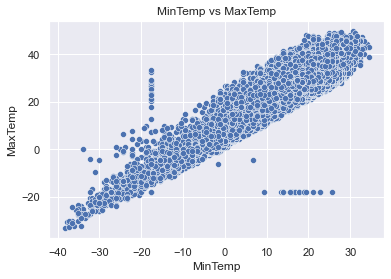

In [8]:
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df)  
pylab.title('MinTemp vs MaxTemp')  
pylab.xlabel('MinTemp')  
pylab.ylabel('MaxTemp')  

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

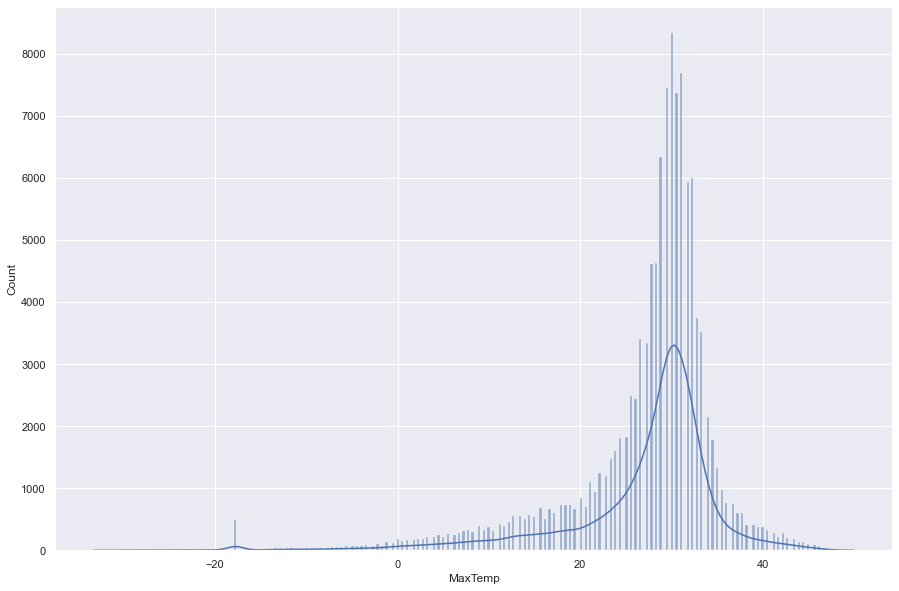

In [9]:
pylab.figure(figsize=(15,10))
pylab.tight_layout()
sns.histplot(df['MaxTemp'], kde=True)

In [10]:
X = df['MinTemp'].values.reshape(-1, 1)
y = df['MaxTemp'].values.reshape(-1, 1)

In [11]:
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [13]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


$\hat{y} = 0.92x + 10.66$

In [17]:
y_pred = regressor.predict(X_test)

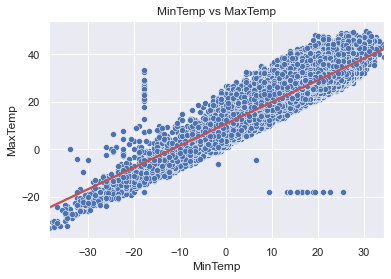

In [18]:
# scatterplot and regresssion line with all of the dataset
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df)  
sns.regplot(x='MinTemp', y='MaxTemp', data=df, color='r', scatter=False)
#pylab.plot(X_test, y_pred) # regression line compared with just the testing set
pylab.title('MinTemp vs MaxTemp')
pylab.xlabel('MinTemp')  
pylab.ylabel('MaxTemp')  
pylab.show()

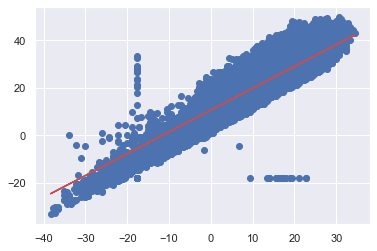

In [19]:
# scatterplot + regression line with just the training data
y_train_pred = regressor.predict(X_train)
pylab.scatter(X_train, y_train)
pylab.plot(X_train, y_train_pred, color='r')

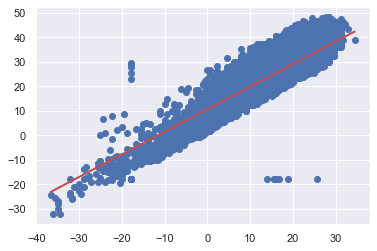

In [20]:
# scatterplot + regression line with just the testing data
y_test_pred = regressor.predict(X_test)
pylab.scatter(X_test, y_test)
pylab.plot(X_test, y_test_pred, color='r')

In [21]:
regressor.score(X, y)

0.7715544932781937

In [22]:
regressor.score(X_train, y_train) # explanatory/descriptive value of the model

0.7726816262390883

In [23]:
regressor.score(X_test, y_test) # predictive value

0.7670218843587762